In [ ]:
#########################################################
# Program name: ckdModel.py
# Description: This program builds a CNN-LSTM model for 
# predicting the CKD outcome for a given patient based on
# longitudinal data.
# Input Data : ./input
# Output Data: ./output
#########################################################

In [19]:
## load the required libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model,load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer

from keras import applications,models, losses,optimizers
from keras.models import Model
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
import numpy as np
import keras.backend as K
from sklearn.model_selection import train_test_split

In [20]:
## Read the data

ckd_data = pd.read_csv('./input/ckd_inputdata.csv')
print(ckd_data.shape)
## Read the stages data
df_stage = pd.read_csv('./dataScienceTask/T_stage.csv')
df_stage.shape

(3865, 32)


(300, 2)

In [86]:
train_idx = df_stage.sample(frac=0.75, random_state=99)
test_idx = df_stage.loc[~df_stage.index.isin(train_idx.index), :]

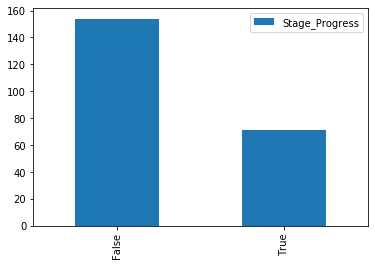

In [87]:
df1 = train_idx.set_index('id').apply(pd.value_counts)
df1.plot.bar()

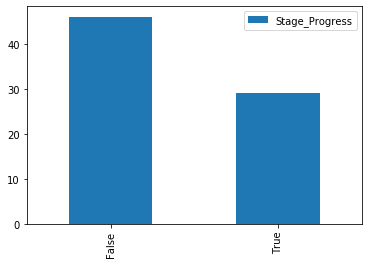

In [88]:
df1 = test_idx.set_index('id').apply(pd.value_counts)
df1.plot.bar()

In [27]:
# Shape the Patient data into the desired input format for CNN 
# convert each patient ID information to a 32 * 32 image
patient = []

for i in range(300):
    sub_data = ckd_data[ckd_data.id == i]
    # change the ID value to -99
    sub_data['id'] = -99
    ## Adding dummy rows
    for x in range(32 - sub_data.shape[0]):
        sub_data = sub_data.append(pd.Series([-99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99, -99,
                                             -99, -99, -99, -99, -99, -99, -99,-99, -99, -99], 
                                             index=sub_data.columns) , ignore_index=True)
    t1 = np.array(sub_data.values)
    
    t2 = t1.reshape(32, 32, 1)
    patient.append(t2)

patient = np.array(patient)
patient = np.reshape(patient,(patient.shape[0],32,32,1))
print(patient.shape)

C:\Users\sindh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(300, 32, 32, 1)


In [40]:

# Create a dictionary to identify each image by ID
patient_info = {}
for i in range(300):
    patient_info.setdefault("dat",[]).append({i:X[i]})

In [32]:
## Prepare the X and Y variables
from keras.utils.np_utils import to_categorical

X = patient
Y = df_stage[['Stage_Progress']].values
Y = to_categorical(Y, 2)

In [ ]:
# Split the data into train and test data

# 75-25 train test split
(trainX, testX, trainY, testY) = train_test_split(X, Y, test_size=0.25)

In [ ]:
print("Training data shape:", trainX.shape, trainY.shape)
print("Test data shape:", testX.shape, testY.shape)

In [17]:
## Split into test and train data
# Random sample indexes
train_index <- sample(1:range(len(X)), 0.8 * range(len(X)))
test_index <- setdiff(1:range(len(X)), train_index)

# # Build X_train, y_train, X_test, y_test
# X_train <- adult[train_index, -15]
# y_train <- adult[train_index, "income"]

# X_test <- adult[test_index, -15]
# y_test <- adult[test_index, "income"]

SyntaxError: invalid syntax (<ipython-input-17-1b280ef4ef94>, line 3)

In [ ]:
## CNN model
batch_size = 32
epochs = 100
filepath='./output/'

In [ ]:
np.random.seed(109) # for reproducibility
print('Building model...')
model = Sequential()
model = Sequential()

#1st conv layer
model.add(Conv2D(64, (4,10), padding="same",
                 input_shape=(trainX.shape[1],trainX.shape[2],trainX.shape[3])))
model.add(BatchNormalization())
model.add(Activation("relu"))

#2nd conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

#3rd conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4th conv layer
model.add(Conv2D(32, (4,10), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

#FC1
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))

#FC2
model.add(Dense(100,name ='feature_dense'))
#model.load_weights(by_name=True,filepath = filepath)
model.add(BatchNormalization())
model.add(Activation("relu"))

#output FC
model.add(Dense(2))
model.add(Activation('sigmoid'))
adam = optimizers.Adam(lr=0.01)

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

In [ ]:
early_stops = EarlyStopping(patience=10 , monitor='val_auc')
filepath='ckd_model_conv2D'
ckpt_callback = ModelCheckpoint(filepath,
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='auto')
    
model.fit(X, Y, validation_split=0.05, callbacks=[early_stops,ckpt_callback], 
                        batch_size=batch_size, epochs=epochs)
model.save('ckd_model_conv2D.h5')

In [ ]:
## Load the model and perform prediction on test data
pred_Y = model.predict(testX, batch_size = 32, verbose = True)